## Load and import packages

In [25]:
import plotly.offline as offline
import plotly.graph_objs as go
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import FreqDist
import matplotlib.pyplot as plt
from subprocess import check_output
import re

In [ ]:
!pip install scattertext
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import plotly.graph_objs as go
import chart_studio.plotly as py
!pip install cufflinks
import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()
from collections import Counter
import scattertext as st
import spacy
from pprint import pprint
import en_core_web_sm
nlp = spacy.load("en_core_web_sm")

## Import and clean raw data file

In [8]:
#Import raw data
df = pd.read_csv('C:/Users/sebas/OneDrive/Desktop/All-seasons.csv')
df.head()

Season Episode Character                                               Line
0     10       1      Stan         You guys, you guys! Chef is going away. \n
1     10       1      Kyle                        Going away? For how long?\n
2     10       1      Stan                                         Forever.\n
3     10       1      Chef                                  I'm sorry boys.\n
4     10       1      Stan  Chef said he's been bored, so he joining a gro...

In [9]:
#Use clean dataset to generate visualizations
def clean_text(text):
    '''Clean text by removing unnecessary characters and altering the format of words.'''

    text = text.lower()
    
    text = re.sub(r"\n", "",  text)
    text = re.sub(r"[-()]", "", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"\!", " ", text)
    text = re.sub(r"\?", " ", text)
    text = re.sub(r"\,", " ", text)
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "that is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"n'", "ng", text)
    text = re.sub(r"ohh", "oh", text)
    text = re.sub(r"ohhh", "oh", text)
    text = re.sub(r"ohhhh", "oh", text)
    text = re.sub(r"ohhhhh", "oh", text)
    text = re.sub(r"ohhhhhh", "oh", text)
    text = re.sub(r"ahh", "ah", text)
    
    return text

In [10]:
for i in range(0,len(df.Line)):
    df.Line[i] = clean_text(df.Line[i])

In [11]:
df

Season Episode Character  \
0         10       1      Stan   
1         10       1      Kyle   
2         10       1      Stan   
3         10       1      Chef   
4         10       1      Stan   
...      ...     ...       ...   
70891      9      14      Stan   
70892      9      14     Randy   
70893      9      14      Stan   
70894      9      14     Randy   
70895      9      14      Stan   

                                                    Line  
0               you guys  you guys  chef is going away    
1                              going away  for how long   
2                                               forever   
3                                       i am sorry boys   
4      chef said he is been bored  so he joining a gr...  
...                                                  ...  
70891                        i think you are pushing it   
70892                                  how about twenty   
70893                            that is not disciprine   
70894                     right right  does vodka count   
70895                                               dad   

[70896 rows x 4 columns]

## Generate count frequency of profanity used graph

In [12]:
#Checking missing value in season column to run season based word counting
df['Season'].isnull().sum()

0

In [145]:
swear_words = ['fuck', 'shit', 'bitch', 'damn', 'ass', 'dick', 'crap', 'asshole', 'fucker', 'dumbass', 'motherfucker', 'dickhead']
seasons = list(range(1,19))

swear_words_by_season_df = pd.DataFrame(columns=swear_words, index=seasons)

for season in seasons:
    per_season_df = df.loc[df['Season'] == str(season)]
    
    for swear_word in swear_words:
        count = 0;
        for idx, row in per_season_df.iterrows():
            split_line = row['Line'].split()
            for w in split_line:
                if swear_word in w.lower():
                    count += 1
        swear_words_by_season_df.set_value(season, swear_word, count)
    '''
    all_lines_in_season = per_season_df['Line'].tolist()
    
    all_words_in_season = []
    for line in all_lines_in_season:
        for word in line.split(' '):
            all_words_in_season.append(word)
    
    for swear_word in swear_words:
        num_swear_word_in_season = all_words_in_season.count(swear_word)
        swear_words_by_season_df.set_value(season, swear_word, num_swear_word_in_season)
    '''

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
2   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
3   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
2   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
3   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
2   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
3   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
2   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
3   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152  NaN  NaN     NaN    NaN     NaN          NaN   
2   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
3   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3  NaN     NaN    NaN     NaN          NaN   
2   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
3   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30     NaN    NaN     NaN          NaN   
2   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
3   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5    NaN     NaN          NaN   
2   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
3   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1     NaN          NaN   
2   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
3   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3          NaN   
2   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
3   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
3   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
3   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

"\n    all_lines_in_season = per_season_df['Line'].tolist()\n    \n    all_words_in_season = []\n    for line in all_lines_in_season:\n        for word in line.split(' '):\n            all_words_in_season.append(word)\n    \n    for swear_word in swear_words:\n        num_swear_word_in_season = all_words_in_season.count(swear_word)\n        swear_words_by_season_df.set_value(season, swear_word, num_swear_word_in_season)\n    "

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
3   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
3   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
3   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
3   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207  NaN  NaN     NaN    NaN     NaN          NaN   
3   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30  NaN     NaN    NaN     NaN          NaN   
3   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31     NaN    NaN     NaN          NaN   
3   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11    NaN     NaN          NaN   
3   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7     NaN          NaN   
3   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13          NaN   
3   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

"\n    all_lines_in_season = per_season_df['Line'].tolist()\n    \n    all_words_in_season = []\n    for line in all_lines_in_season:\n        for word in line.split(' '):\n            all_words_in_season.append(word)\n    \n    for swear_word in swear_words:\n        num_swear_word_in_season = all_words_in_season.count(swear_word)\n        swear_words_by_season_df.set_value(season, swear_word, num_swear_word_in_season)\n    "

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269  NaN  NaN     NaN    NaN     NaN          NaN   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7  NaN     NaN    NaN     NaN          NaN   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26     NaN    NaN     NaN          NaN   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16    NaN     NaN          NaN   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0     NaN          NaN   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6          NaN   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

"\n    all_lines_in_season = per_season_df['Line'].tolist()\n    \n    all_words_in_season = []\n    for line in all_lines_in_season:\n        for word in line.split(' '):\n            all_words_in_season.append(word)\n    \n    for swear_word in swear_words:\n        num_swear_word_in_season = all_words_in_season.count(swear_word)\n        swear_words_by_season_df.set_value(season, swear_word, num_swear_word_in_season)\n    "

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189  NaN  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9  NaN     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37     NaN    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12    NaN     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1     NaN          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7          NaN   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

"\n    all_lines_in_season = per_season_df['Line'].tolist()\n    \n    all_words_in_season = []\n    for line in all_lines_in_season:\n        for word in line.split(' '):\n            all_words_in_season.append(word)\n    \n    for swear_word in swear_words:\n        num_swear_word_in_season = all_words_in_season.count(swear_word)\n        swear_words_by_season_df.set_value(season, swear_word, num_swear_word_in_season)\n    "

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148  NaN  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1  NaN     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16     NaN    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26    NaN     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3     NaN          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5          NaN   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

"\n    all_lines_in_season = per_season_df['Line'].tolist()\n    \n    all_words_in_season = []\n    for line in all_lines_in_season:\n        for word in line.split(' '):\n            all_words_in_season.append(word)\n    \n    for swear_word in swear_words:\n        num_swear_word_in_season = all_words_in_season.count(swear_word)\n        swear_words_by_season_df.set_value(season, swear_word, num_swear_word_in_season)\n    "

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164  NaN  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6  NaN     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50     NaN    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26    NaN     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0     NaN          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4          NaN   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

"\n    all_lines_in_season = per_season_df['Line'].tolist()\n    \n    all_words_in_season = []\n    for line in all_lines_in_season:\n        for word in line.split(' '):\n            all_words_in_season.append(word)\n    \n    for swear_word in swear_words:\n        num_swear_word_in_season = all_words_in_season.count(swear_word)\n        swear_words_by_season_df.set_value(season, swear_word, num_swear_word_in_season)\n    "

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136  NaN  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13  NaN     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17     NaN    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26    NaN     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1     NaN          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5          NaN   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

"\n    all_lines_in_season = per_season_df['Line'].tolist()\n    \n    all_words_in_season = []\n    for line in all_lines_in_season:\n        for word in line.split(' '):\n            all_words_in_season.append(word)\n    \n    for swear_word in swear_words:\n        num_swear_word_in_season = all_words_in_season.count(swear_word)\n        swear_words_by_season_df.set_value(season, swear_word, num_swear_word_in_season)\n    "

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123  NaN  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3  NaN     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23     NaN    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19    NaN     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4     NaN          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4          NaN   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9   NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

"\n    all_lines_in_season = per_season_df['Line'].tolist()\n    \n    all_words_in_season = []\n    for line in all_lines_in_season:\n        for word in line.split(' '):\n            all_words_in_season.append(word)\n    \n    for swear_word in swear_words:\n        num_swear_word_in_season = all_words_in_season.count(swear_word)\n        swear_words_by_season_df.set_value(season, swear_word, num_swear_word_in_season)\n    "

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99  NaN  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4  NaN     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24     NaN    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14    NaN     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1     NaN          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2          NaN   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

"\n    all_lines_in_season = per_season_df['Line'].tolist()\n    \n    all_words_in_season = []\n    for line in all_lines_in_season:\n        for word in line.split(' '):\n            all_words_in_season.append(word)\n    \n    for swear_word in swear_words:\n        num_swear_word_in_season = all_words_in_season.count(swear_word)\n        swear_words_by_season_df.set_value(season, swear_word, num_swear_word_in_season)\n    "

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125  NaN  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6  NaN     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37     NaN    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28    NaN     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1     NaN          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1          NaN   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

"\n    all_lines_in_season = per_season_df['Line'].tolist()\n    \n    all_words_in_season = []\n    for line in all_lines_in_season:\n        for word in line.split(' '):\n            all_words_in_season.append(word)\n    \n    for swear_word in swear_words:\n        num_swear_word_in_season = all_words_in_season.count(swear_word)\n        swear_words_by_season_df.set_value(season, swear_word, num_swear_word_in_season)\n    "

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122  NaN  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8  NaN     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74     NaN    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24    NaN     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0     NaN          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1          NaN   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

"\n    all_lines_in_season = per_season_df['Line'].tolist()\n    \n    all_words_in_season = []\n    for line in all_lines_in_season:\n        for word in line.split(' '):\n            all_words_in_season.append(word)\n    \n    for swear_word in swear_words:\n        num_swear_word_in_season = all_words_in_season.count(swear_word)\n        swear_words_by_season_df.set_value(season, swear_word, num_swear_word_in_season)\n    "

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78  NaN  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17  NaN     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22     NaN    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20    NaN     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1     NaN          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0          NaN   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

"\n    all_lines_in_season = per_season_df['Line'].tolist()\n    \n    all_words_in_season = []\n    for line in all_lines_in_season:\n        for word in line.split(' '):\n            all_words_in_season.append(word)\n    \n    for swear_word in swear_words:\n        num_swear_word_in_season = all_words_in_season.count(swear_word)\n        swear_words_by_season_df.set_value(season, swear_word, num_swear_word_in_season)\n    "

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96  NaN  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18  NaN     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26     NaN    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15    NaN     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6     NaN          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2          NaN   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

"\n    all_lines_in_season = per_season_df['Line'].tolist()\n    \n    all_words_in_season = []\n    for line in all_lines_in_season:\n        for word in line.split(' '):\n            all_words_in_season.append(word)\n    \n    for swear_word in swear_words:\n        num_swear_word_in_season = all_words_in_season.count(swear_word)\n        swear_words_by_season_df.set_value(season, swear_word, num_swear_word_in_season)\n    "

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61  NaN  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7  NaN     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21     NaN    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16    NaN     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7     NaN          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0          NaN   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15      NaN  
16      NaN  
17      NaN  
18      NaN

"\n    all_lines_in_season = per_season_df['Line'].tolist()\n    \n    all_words_in_season = []\n    for line in all_lines_in_season:\n        for word in line.split(' '):\n            all_words_in_season.append(word)\n    \n    for swear_word in swear_words:\n        num_swear_word_in_season = all_words_in_season.count(swear_word)\n        swear_words_by_season_df.set_value(season, swear_word, num_swear_word_in_season)\n    "

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117  NaN  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17  NaN     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38     NaN    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12    NaN     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2     NaN          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2          NaN   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15      NaN  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16      NaN  
17      NaN  
18      NaN

"\n    all_lines_in_season = per_season_df['Line'].tolist()\n    \n    all_words_in_season = []\n    for line in all_lines_in_season:\n        for word in line.split(' '):\n            all_words_in_season.append(word)\n    \n    for swear_word in swear_words:\n        num_swear_word_in_season = all_words_in_season.count(swear_word)\n        swear_words_by_season_df.set_value(season, swear_word, num_swear_word_in_season)\n    "

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30    19  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30    19   26  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30    19   26  110  NaN  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30    19   26  110    6  NaN     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30    19   26  110    6   21     NaN    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30    19   26  110    6   21      17    NaN     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30    19   26  110    6   21      17      5     NaN          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30    19   26  110    6   21      17      5       0          NaN   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30    19   26  110    6   21      17      5       0            3   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16      NaN  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30    19   26  110    6   21      17      5       0            3   
17  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16        0  
17      NaN  
18      NaN

"\n    all_lines_in_season = per_season_df['Line'].tolist()\n    \n    all_words_in_season = []\n    for line in all_lines_in_season:\n        for word in line.split(' '):\n            all_words_in_season.append(word)\n    \n    for swear_word in swear_words:\n        num_swear_word_in_season = all_words_in_season.count(swear_word)\n        swear_words_by_season_df.set_value(season, swear_word, num_swear_word_in_season)\n    "

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30    19   26  110    6   21      17      5       0            3   
17   71  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16        0  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30    19   26  110    6   21      17      5       0            3   
17   71   30   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16        0  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30    19   26  110    6   21      17      5       0            3   
17   71   30    21  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16        0  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30    19   26  110    6   21      17      5       0            3   
17   71   30    21   16  NaN  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16        0  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30    19   26  110    6   21      17      5       0            3   
17   71   30    21   16   48  NaN  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16        0  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30    19   26  110    6   21      17      5       0            3   
17   71   30    21   16   48   11  NaN     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16        0  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30    19   26  110    6   21      17      5       0            3   
17   71   30    21   16   48   11    7     NaN    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16        0  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30    19   26  110    6   21      17      5       0            3   
17   71   30    21   16   48   11    7       8    NaN     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16        0  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30    19   26  110    6   21      17      5       0            3   
17   71   30    21   16   48   11    7       8      0     NaN          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16        0  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30    19   26  110    6   21      17      5       0            3   
17   71   30    21   16   48   11    7       8      0       0          NaN   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16        0  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30    19   26  110    6   21      17      5       0            3   
17   71   30    21   16   48   11    7       8      0       0            0   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16        0  
17      NaN  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30    19   26  110    6   21      17      5       0            3   
17   71   30    21   16   48   11    7       8      0       0            0   
18  NaN  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16        0  
17        0  
18      NaN

"\n    all_lines_in_season = per_season_df['Line'].tolist()\n    \n    all_words_in_season = []\n    for line in all_lines_in_season:\n        for word in line.split(' '):\n            all_words_in_season.append(word)\n    \n    for swear_word in swear_words:\n        num_swear_word_in_season = all_words_in_season.count(swear_word)\n        swear_words_by_season_df.set_value(season, swear_word, num_swear_word_in_season)\n    "

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30    19   26  110    6   21      17      5       0            3   
17   71   30    21   16   48   11    7       8      0       0            0   
18   85  NaN   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16        0  
17        0  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30    19   26  110    6   21      17      5       0            3   
17   71   30    21   16   48   11    7       8      0       0            0   
18   85   44   NaN  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16        0  
17        0  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30    19   26  110    6   21      17      5       0            3   
17   71   30    21   16   48   11    7       8      0       0            0   
18   85   44    12  NaN  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16        0  
17        0  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30    19   26  110    6   21      17      5       0            3   
17   71   30    21   16   48   11    7       8      0       0            0   
18   85   44    12   23  NaN  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16        0  
17        0  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30    19   26  110    6   21      17      5       0            3   
17   71   30    21   16   48   11    7       8      0       0            0   
18   85   44    12   23   62  NaN  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16        0  
17        0  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30    19   26  110    6   21      17      5       0            3   
17   71   30    21   16   48   11    7       8      0       0            0   
18   85   44    12   23   62   17  NaN     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16        0  
17        0  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30    19   26  110    6   21      17      5       0            3   
17   71   30    21   16   48   11    7       8      0       0            0   
18   85   44    12   23   62   17    7     NaN    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16        0  
17        0  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30    19   26  110    6   21      17      5       0            3   
17   71   30    21   16   48   11    7       8      0       0            0   
18   85   44    12   23   62   17    7      10    NaN     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16        0  
17        0  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30    19   26  110    6   21      17      5       0            3   
17   71   30    21   16   48   11    7       8      0       0            0   
18   85   44    12   23   62   17    7      10      1     NaN          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16        0  
17        0  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30    19   26  110    6   21      17      5       0            3   
17   71   30    21   16   48   11    7       8      0       0            0   
18   85   44    12   23   62   17    7      10      1       0          NaN   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16        0  
17        0  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30    19   26  110    6   21      17      5       0            3   
17   71   30    21   16   48   11    7       8      0       0            0   
18   85   44    12   23   62   17    7      10      1       0            1   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16        0  
17        0  
18      NaN

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30    19   26  110    6   21      17      5       0            3   
17   71   30    21   16   48   11    7       8      0       0            0   
18   85   44    12   23   62   17    7      10      1       0            1   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16        0  
17        0  
18        0

"\n    all_lines_in_season = per_season_df['Line'].tolist()\n    \n    all_words_in_season = []\n    for line in all_lines_in_season:\n        for word in line.split(' '):\n            all_words_in_season.append(word)\n    \n    for swear_word in swear_words:\n        num_swear_word_in_season = all_words_in_season.count(swear_word)\n        swear_words_by_season_df.set_value(season, swear_word, num_swear_word_in_season)\n    "

In [156]:
swear_words_by_season_df

fuck shit bitch damn  ass dick crap asshole fucker dumbass motherfucker  \
1    19    5    63   71  152    3   30       5      1       3            0   
2    48   21    53   84  207   30   31      11      7      13            3   
3    29   10    43   95  269    7   26      16      0       6            0   
4    14    7    22   69  189    9   37      12      1       7            0   
5    15  168    14   73  148    1   16      26      3       5            2   
6    29   25    15   69  164    6   50      26      0       4            0   
7    29   16    16   53  136   13   17      26      1       5            1   
8    43    7    27   36  123    3   23      19      4       4            4   
9    15    7    14   40   99    4   24      14      1       2            1   
10   18    4    20   41  125    6   37      28      1       1            1   
11   32   35    12   25  122    8   74      24      0       1            0   
12   53   10    14   45   78   17   22      20      1       0            0   
13  106   18    59   29   96   18   26      15      6       2            5   
14  162   21    28   16   61    7   21      16      7       0            6   
15  133  116    22   24  117   17   38      12      2       2            0   
16  100   30    19   26  110    6   21      17      5       0            3   
17   71   30    21   16   48   11    7       8      0       0            0   
18   85   44    12   23   62   17    7      10      1       0            1   

   dickhead  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         2  
8         0  
9         0  
10        1  
11        1  
12        1  
13        1  
14        0  
15        0  
16        0  
17        0  
18        0

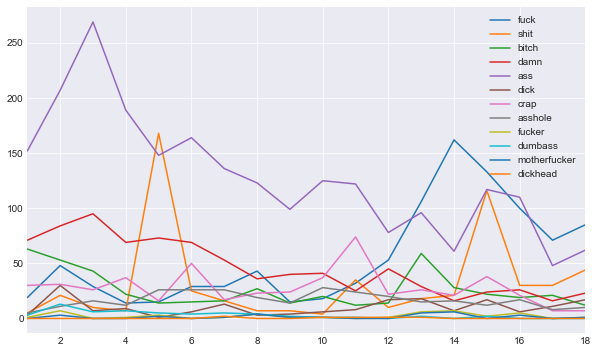

In [163]:
#Basic plot for swear words
ax = swear_words_by_season_df.plot() 

In [172]:
#Creating Offline version chart with custom settings 
data = []
for i in swear_words_by_season_df.columns:
    
        
    i = go.Scatter(
        x=['S-1', 'S-2', 'S-3', 'S-4', 'S-5', 'S-6', 'S-7', 'S-8', 'S-9', 'S-10', 'S-11', 'S-12', 'S-13', 'S-14', 'S-15', 'S-16', 'S-17', 'S-18'],
        y= swear_words_by_season_df[i],
        mode='lines+markers',
        name= str(i),
        hoverinfo = 'name',
        line = dict(shape='linear'))
    data.append(i)


layout = dict(
title="Frequency of Profanity in South Park by Season",
xaxis = dict(title = 'South Park Season'),
yaxis = dict(title = 'Profanity Frequency'),        
legend=dict(
    x=1,
    y=0.5,
    font=dict(
        size=16)        ),    )
fig = go.Figure(data=data, layout=layout)
offline.plot(fig)

'temp-plot.html'

## Get new dataframe with characters with more than 1000 lines

In [32]:
print(df.head())
print(len(df))
print(df.Character.value_counts())
print(type(df.Character.nunique()))

  Season Episode Character                                               Line
0     10       1      Stan           you guys  you guys  chef is going away  
1     10       1      Kyle                          going away  for how long 
2     10       1      Stan                                           forever 
3     10       1      Chef                                   i am sorry boys 
4     10       1      Stan  chef said he is been bored  so he joining a gr...
70896
Cartman             9774
Stan                7680
Kyle                7099
Butters             2602
Randy               2467
                    ... 
Mr. Tumnus             1
Enrique Iglesias       1
Gram'ma                1
Student 3              1
Member 6               1
Name: Character, Length: 3950, dtype: int64
<class 'int'>


In [33]:
values = df.Character.value_counts()
print(type(values))
print(values.index)
print(values.values)
namedata = values[values.values > 1000]
print(namedata)
names = namedata.index.tolist()
names.append('Kenny')
print(names)

<class 'pandas.core.series.Series'>
Index(['Cartman', 'Stan', 'Kyle', 'Butters', 'Randy', 'Mr. Garrison', 'Chef',
       'Kenny', 'Sharon', 'Mr. Mackey',
       ...
       'DC Crew', 'Springer', 'Cleric 1', 'With the Damned', 'Wyoming Coach',
       'Mr. Tumnus', 'Enrique Iglesias', 'Gram'ma', 'Student 3', 'Member 6'],
      dtype='object', length=3950)
[9774 7680 7099 ...    1    1    1]
Cartman         9774
Stan            7680
Kyle            7099
Butters         2602
Randy           2467
Mr. Garrison    1002
Name: Character, dtype: int64
['Cartman', 'Stan', 'Kyle', 'Butters', 'Randy', 'Mr. Garrison', 'Kenny']


In [34]:
FinalData = df[df.Character.isin(names)]
print(FinalData.reset_index(drop = True))
print(len(FinalData))
print(FinalData.head())

      Season Episode Character  \
0         10       1      Stan   
1         10       1      Kyle   
2         10       1      Stan   
3         10       1      Stan   
4         10       1   Cartman   
...      ...     ...       ...   
31500      9      14      Stan   
31501      9      14     Randy   
31502      9      14      Stan   
31503      9      14     Randy   
31504      9      14      Stan   

                                                    Line  
0               you guys  you guys  chef is going away    
1                              going away  for how long   
2                                               forever   
3      chef said he is been bored  so he joining a gr...  
4      i am gonna miss him   i am gonna miss chef and...  
...                                                  ...  
31500                        i think you are pushing it   
31501                                  how about twenty   
31502                            that is not disciprine   
3

## Generate wordcloud for all script lines/dialogues and each character

In [35]:
from os import path, getcwd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

<Figure size 1080x720 with 0 Axes>

(-0.5, 999.5, 499.5, -0.5)

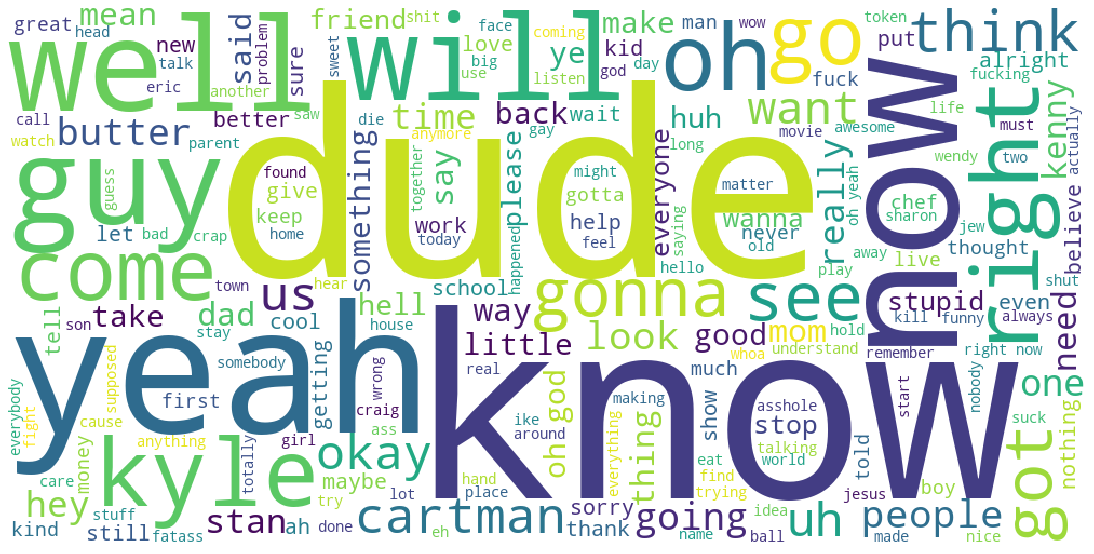

In [36]:
#Create normal wordcloud for the entire dataset
stopwords = STOPWORDS
comment_words = ''
for x in FinalData.Line:
    t = x.split()
    for i in range(len(t)):
        t[i] = t[i].lower()
    
    comment_words += " ".join(t)+" "
wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white', stopwords = STOPWORDS, min_font_size = 10).generate(comment_words)
plt.figure(figsize = (15, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [37]:
#Import image for masking wordcloud. link to image: https://www.clipartkey.com/mpngs/m/249-2497718_south-park-logo-black-and-white-south-park.png
from PIL import Image
sp_logo = np.array(Image.open("sp_logo.png"))
sp_logo

array([[[247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        ...,
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255]],

       [[247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        ...,
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255]],

       [[247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        ...,
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255]],

       ...,

       [[247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        ...,
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255]],

       [[247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        ...,
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255]],

       [[247

<Figure size 1440x720 with 0 Axes>

(-0.5, 899.5, 1089.5, -0.5)

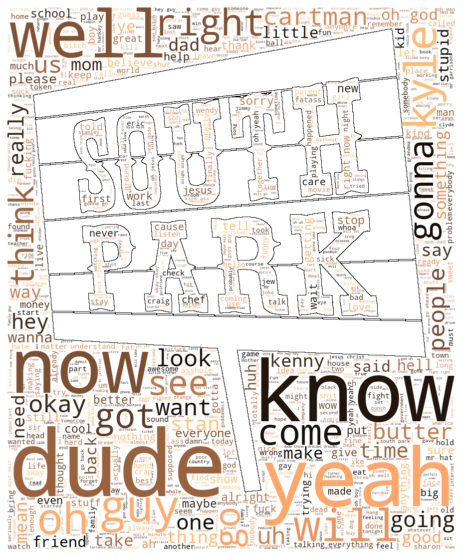

In [38]:
#Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=sp_logo,
               stopwords=stopwords, contour_width=1, colormap="copper", contour_color='black')
wc.generate(comment_words)
wc.to_file("southparklogowc.png")
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [39]:
g = list(FinalData.Character.unique())
print(g.index('Kenny'))
print(len(g))
print(g)

4
7
['Stan', 'Kyle', 'Cartman', 'Randy', 'Kenny', 'Butters', 'Mr. Garrison']


Text(0.5, 1.0, 'Stan WordCloud')

(-0.5, 799.5, 799.5, -0.5)

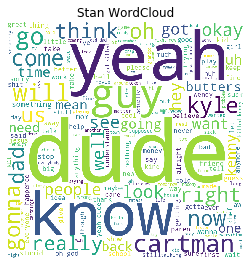

Text(0.5, 1.0, 'Kyle WordCloud')

(-0.5, 799.5, 799.5, -0.5)

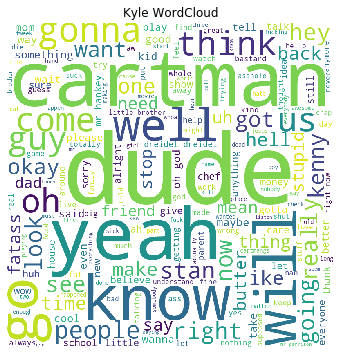

Text(0.5, 1.0, 'Cartman WordCloud')

(-0.5, 799.5, 799.5, -0.5)

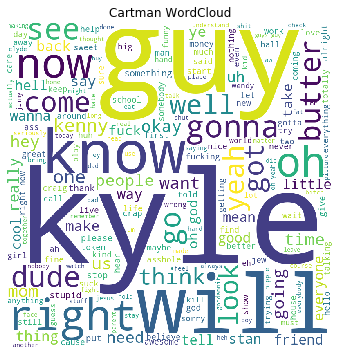

Text(0.5, 1.0, 'Randy WordCloud')

(-0.5, 799.5, 799.5, -0.5)

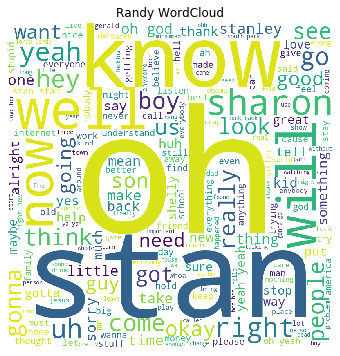

Text(0.5, 1.0, 'Kenny WordCloud')

(-0.5, 799.5, 799.5, -0.5)

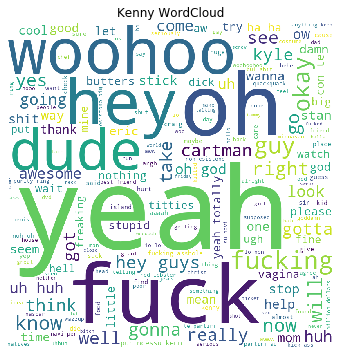

Text(0.5, 1.0, 'Butters WordCloud')

(-0.5, 799.5, 799.5, -0.5)

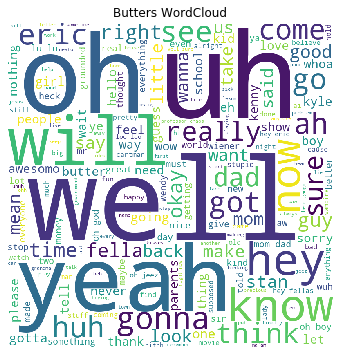

Text(0.5, 1.0, 'Mr. Garrison WordCloud')

(-0.5, 799.5, 799.5, -0.5)

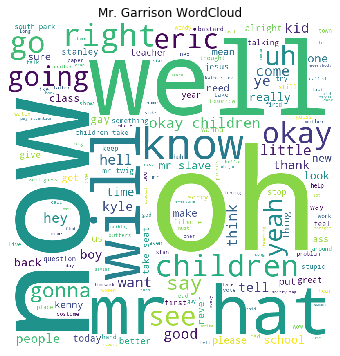

In [40]:
#Wordcloud for each character
fig = plt.figure(figsize = (20,20), facecolor = None)
for t in list(FinalData.Character.unique()):
    stopwords = STOPWORDS
    comment_words = ''
    for x in FinalData.Line[FinalData.Character == t]:
        z = x.split()
        for i in range(len(z)):
            z[i] = z[i].lower()
    
        comment_words += " ".join(z)+" "
    wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', stopwords = STOPWORDS, min_font_size = 10).generate(comment_words)
    wordcloud.to_file(t+"_wordcloud.png")
    fig.add_subplot(4,2,list(FinalData.Character.unique()).index(t) + 1)
    plt.title(t + " WordCloud")
    plt.imshow(wordcloud) 
    plt.axis('off')
  
    plt.show()

## Get unigrams, bigrams, and bigrams for entire dataset

In [41]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(FinalData['Line'], 20)
for word, freq in common_words:
    print(word, freq)
df_unigram = pd.DataFrame(common_words, columns = ['Line' , 'frequency'])

oh 2538
just 2442
yeah 2051
dude 1916
know 1659
guys 1493
gonna 1448
right 1441
like 1390
kyle 1308
did 1233
come 1201
hey 1176
okay 1090
ve 1078
uh 1043
think 1033
let 987
cartman 970
got 961


In [42]:
df_unigram

Line  frequency
0        oh       2538
1      just       2442
2      yeah       2051
3      dude       1916
4      know       1659
5      guys       1493
6     gonna       1448
7     right       1441
8      like       1390
9      kyle       1308
10      did       1233
11     come       1201
12      hey       1176
13     okay       1090
14       ve       1078
15       uh       1043
16    think       1033
17      let        987
18  cartman        970
19      got        961

In [49]:
df_unigram.groupby('Line').sum()['frequency'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', color='purple', title='Top 20 Unigrams in review after removing stop words')

In [44]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(FinalData['Line'], 20)
for word, freq in common_words:
    print(word, freq)
df_bigram = pd.DataFrame(common_words, columns = ['Line' , 'frequency'])

oh god 416
ve got 257
ve gotta 159
oh yeah 138
mr hat 108
south park 104
hey guys 99
looks like 99
jesus christ 94
wait minute 92
come guys 90
mr hankey 84
mr garrison 82
yeah yeah 80
let just 77
okay okay 76
oh oh 75
hell doing 73
oh jesus 72
mom dad 72


In [48]:
df_bigram.groupby('Line').sum()['frequency'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', color='pink', title='Top 20 bigrams in review after removing stop words')

In [46]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_trigram(FinalData['Line'], 20)
for word, freq in common_words:
    print(word, freq)
df_trigram = pd.DataFrame(common_words, columns = ['Line' , 'frequency'])

ha ha ha 33
oh god killed 30
god killed kenny 29
oh god oh 25
oh god ve 25
dreidel dreidel dreidel 25
god ve killed 21
god oh god 20
does make sense 19
wait wait wait 19
hey wait minute 18
ve killed kenny 18
omigod omigod omigod 17
okay children let 16
lu lu lu 15
children let seats 15
oh god guys 15
yeah yeah yeah 15
lorde lorde lorde 15
come ve gotta 14


In [47]:
df_trigram.groupby('Line').sum()['frequency'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', color ='red',title='Top 20 trigrams in review after removing stop words')

## Find top 10 unigrams for each character

In [50]:
#Getting top n words for each character
Characters = FinalData['Character'].unique()
Characters

array(['Stan', 'Kyle', 'Cartman', 'Randy', 'Kenny', 'Butters',
       'Mr. Garrison'], dtype=object)

In [51]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [29]:
Characters = FinalData['Character'].unique()

for c in Characters:
    #Creating DF for the character
    a =  FinalData['Character']== c
    c_df = FinalData[a]
    c_df.head(3)
    
    #Find top 10 unigrams for the Character
    common_words = get_top_n_words(c_df['Line'], 10)
    for word, freq in common_words:
        print(word, freq)
    character_unigram = pd.DataFrame(common_words, columns = ['Line' , 'count'])
    
    #Plot unigrams for the character
    title = " ".join(['Top 10 Words Used by', c])
    color = {'Stan':'red', "Kyle":'green', 'Cartman':'red', 'Randy':'turquoise', 'Kenny':'orange', 'Butters': 'yellow', 'Mr. Garrison': 'grey'} 

    character_unigram.groupby('Line').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', color =color.get(c),title=title)
    

Season Episode Character                                               Line
0     10       1      Stan           you guys  you guys  chef is going away  
2     10       1      Stan                                           forever 
4     10       1      Stan  chef said he is been bored  so he joining a gr...

dude 853
just 567
yeah 531
oh 417
know 353
cartman 351
gonna 337
come 331
dad 320
kyle 307


Season Episode Character                       Line
1      10       1      Kyle  going away  for how long 
19     10       1      Kyle     draw two card  fatass 
24     10       1      Kyle                      yeah

dude 609
cartman 524
just 477
yeah 443
know 330
oh 319
did 290
gonna 264
like 251
stan 235


Season Episode Character                                               Line
9      10       1   Cartman  i am gonna miss him   i am gonna miss chef and...
20     10       1   Cartman                              reverse to you  jew  
25     10       1   Cartman                                        all right

oh 948
kyle 883
guys 864
just 845
right 621
know 574
gonna 554
yeah 525
like 524
butters 478


Season Episode Character                                               Line
17     10       1     Randy  goodbye  chef  have a great time with the supe...
32     10       1     Randy                                      oh  finally  
37     10       1     Randy  ohh  so have you decided you can still belong ...

oh 311
just 242
stan 233
yeah 232
know 171
right 155
sharon 137
uh 135
did 121
like 115


Season Episode Character              Line
53      10       1     Kenny     yeah  me too 
103     10       1     Kenny        like what 
106     10       1     Kenny  yeah  i think

yeah 105
oh 58
hey 50
fuck 43
guys 41
woohoo 36
fucking 36
dude 34
okay 28
uh 25


Season Episode Character  \
84      10       1   Butters   
90      10       1   Butters   
333     10       2   Butters   

                                                  Line  
84                                that is a pedophile   
90                  my uncle bud did that to me once    
333  uh hay  stan  uh you should come on over  uh t...

oh 356
uh 303
just 198
hey 180
yeah 172
know 143
like 135
eric 121
gonna 121
did 109


Season Episode     Character  \
8005     12       5  Mr. Garrison   
8007     12       5  Mr. Garrison   
8070     12       6  Mr. Garrison   

                                                   Line  
8005  thanks everyone  it is great to be back  i am ...  
8007  well then get an aids test  thompson  'cause y...  
8070  there has to be a way to find out that is goin...

mr 156
oh 129
children 119
hat 97
okay 94
just 93
know 68
let 64
right 61
eric 58
